## Room Occupancy Detection

Using statisticals classification models to predict occupancy in an office room, is a considerably great strategy for energy saving and improvement of energy efficiency. There have been studies that support that Heating Ventilation and Cooling(HVAC) represents one of the largest sources of energy consumptions in residentials and buildings. However, by implementing smart monitoring it is reported to save energy by 30 to 42%. This data set has been sourced from the Machine Learning Repository of University of California. This notebook supports some of the results by evaluating the datasets as part of the article "Accurate occupancy detection of an office room from light, temperature, humidity and CO2 measurements using statistical learning models". My goal is to evaluate different machine learning techniques and their accuracy.

### Data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('datatraining.csv')

In [3]:
df.head(10)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2/4/2015 17:51,23.180,27.2720,426.0,721.250000,0.004793,1
1,2/4/2015 17:51,23.150,27.2675,429.5,714.000000,0.004783,1
2,2/4/2015 17:53,23.150,27.2450,426.0,713.500000,0.004779,1
3,2/4/2015 17:54,23.150,27.2000,426.0,708.250000,0.004772,1
4,2/4/2015 17:55,23.100,27.2000,426.0,704.500000,0.004757,1
5,2/4/2015 17:55,23.100,27.2000,419.0,701.000000,0.004757,1
6,2/4/2015 17:57,23.100,27.2000,419.0,701.666667,0.004757,1
7,2/4/2015 17:57,23.100,27.2000,419.0,699.000000,0.004757,1
8,2/4/2015 17:58,23.100,27.2000,419.0,689.333333,0.004757,1
9,2/4/2015 18:00,23.075,27.1750,419.0,688.000000,0.004745,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8143 entries, 0 to 8142
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8143 non-null   object 
 1   Temperature    8143 non-null   float64
 2   Humidity       8143 non-null   float64
 3   Light          8143 non-null   float64
 4   CO2            8143 non-null   float64
 5   HumidityRatio  8143 non-null   float64
 6   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 445.4+ KB


As a first evaluation, I can tell that there are duplicates values in dates, mostly on minutes. Probably because the sensors don't get seconds i.e see row 0 and 1, 4 and 5. Even though, through data cleansing it will be formatted, dates are usually useful as continuous values to evaluate how all the physical factors (temperature, humidity, etc) behave through time.

## Detect Occupancy through Light, Temperature, Humidity and CO2 sensors

In [5]:
df['Occupancy'].value_counts()

0    6414
1    1729
Name: Occupancy, dtype: int64

### Data Cleansing

In [6]:
duplicate=df.copy()

In [7]:
df['date']=pd.to_datetime(df['date'])
duplicate['date']=pd.to_datetime(duplicate['date'])

In [8]:
duplicate= duplicate[duplicate.duplicated(['date'],keep='first')]

In [9]:
import datetime
T1 = datetime.timedelta(hours=0,minutes=1)

In [10]:
while duplicate.empty == False :
    duplicate['date']=duplicate['date']+T1
    df.update(duplicate)
    duplicate= df[df.duplicated(['date'],keep='first')]

<ipython-input-10-eac7d5593a67>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicate['date']=duplicate['date']+T1


In [11]:
duplicate.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy


In [12]:
df.head(10)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2015-02-04 17:51:00,23.180,27.2720,426.0,721.250000,0.004793,1.0
1,2015-02-04 17:52:00,23.150,27.2675,429.5,714.000000,0.004783,1.0
2,2015-02-04 17:53:00,23.150,27.2450,426.0,713.500000,0.004779,1.0
3,2015-02-04 17:54:00,23.150,27.2000,426.0,708.250000,0.004772,1.0
4,2015-02-04 17:55:00,23.100,27.2000,426.0,704.500000,0.004757,1.0
5,2015-02-04 17:56:00,23.100,27.2000,419.0,701.000000,0.004757,1.0
6,2015-02-04 17:57:00,23.100,27.2000,419.0,701.666667,0.004757,1.0
7,2015-02-04 17:58:00,23.100,27.2000,419.0,699.000000,0.004757,1.0
8,2015-02-04 17:59:00,23.100,27.2000,419.0,689.333333,0.004757,1.0
9,2015-02-04 18:00:00,23.075,27.1750,419.0,688.000000,0.004745,1.0


Now the data is well adequated without dates duplicated.

## Data visualizaton

Let's plot all the data through time sequence

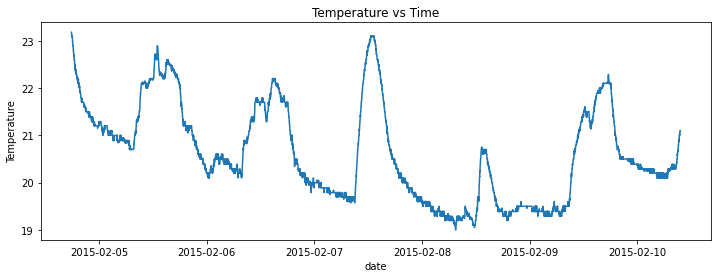

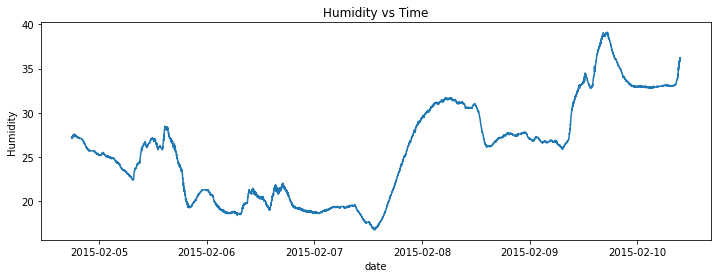

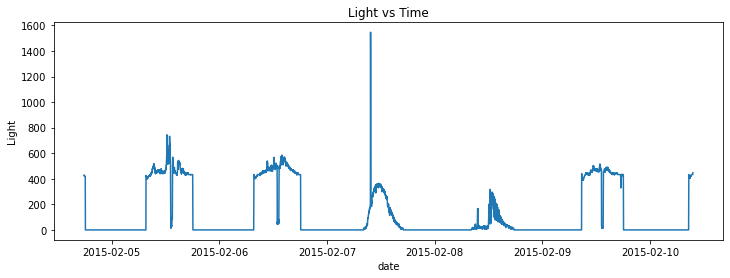

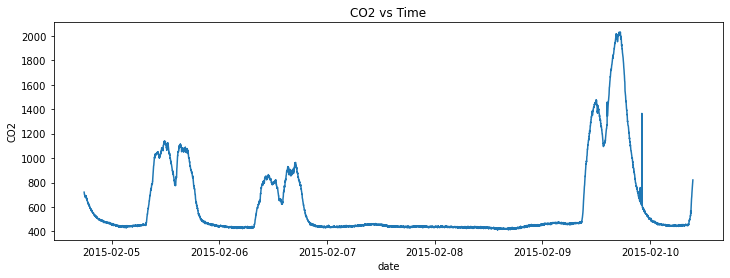

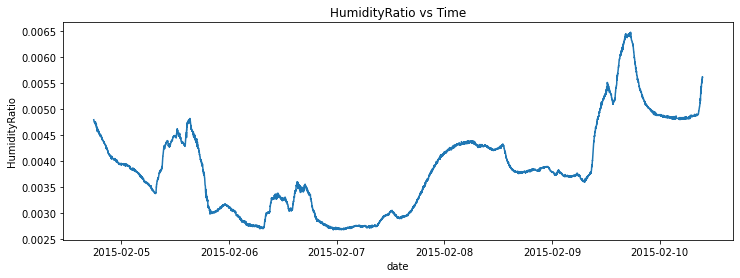

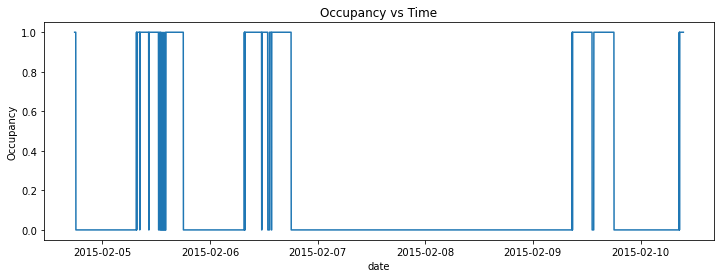

In [21]:
for i in list(df.columns[1:7]):
    fig = plt.figure(figsize=(12, 4))
    sns.lineplot(x="date", y=i,data=df)
    plt.title('{} vs Time'.format(i))
    fig.savefig('Graphs{}.png'.format(i))
    plt.show()

Now why CO2 and light are important variable for this analysis?.

<AxesSubplot:>

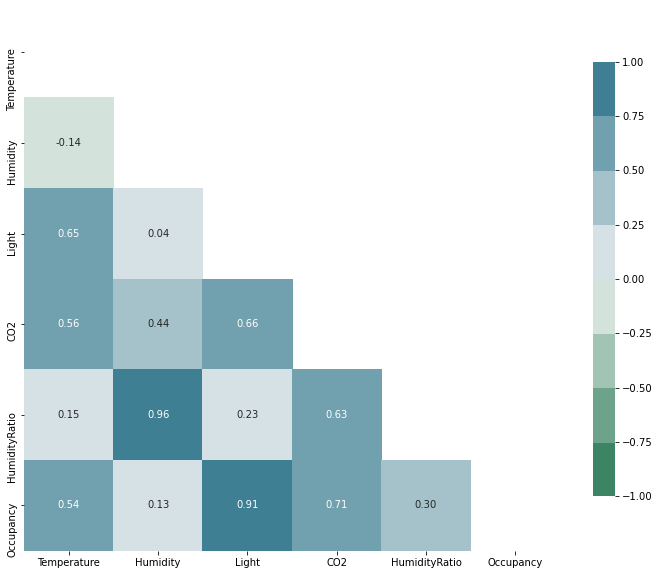

In [14]:
df_corr = df[['Temperature','Humidity','Light','CO2','HumidityRatio','Occupancy']].corr()
fig, ax = plt.subplots(figsize=(12, 10))
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
sns.heatmap(df_corr, mask = mask, annot = True, fmt = ".2f", cmap = sns.diverging_palette(150, 220, n=8),
           vmin = -1, vmax = 1, cbar_kws = {"shrink": .8})

We can see that CO2 and light has a good correlation with Occupancy. Indeed levels CO2 increase when people are in a room due to the process of breathing. Now let's evaluate slices of the graphs per day.

In [15]:
df['Date'] = [d.date() for d in df['date']]
df['Time'] = [d.time() for d in df['date']]

In [16]:
date_list=list(df.Date.unique())

In [17]:
def lineplot_graph(date_list,data,variable):
    for i in date_list:
        start_time = pd.to_datetime('00:00:00').time()
        end_time = pd.to_datetime('23:59:00').time()
        day = i
        mask = (data['Time'] >= start_time) & (data['Time'] <= end_time) & (data['Date'] == day)
        fig = plt.figure(figsize=(18, 12))
        ax0 = fig.add_subplot(2, 1, 1)
        ax1 = fig.add_subplot(2, 1, 2)

        # Subplot 1
        sns.lineplot(x="date", y=variable,data=data[mask], ax =ax0)
        ax0.set_title('{} levels on {}'.format(variable,i))
        # Subplot 2
        sns.lineplot(x="date", y="Occupancy",data=data[mask], color='red', ax =ax1)
        ax1.set_title ('Occupancy Status on {0}'.format(i))

        plt.show()

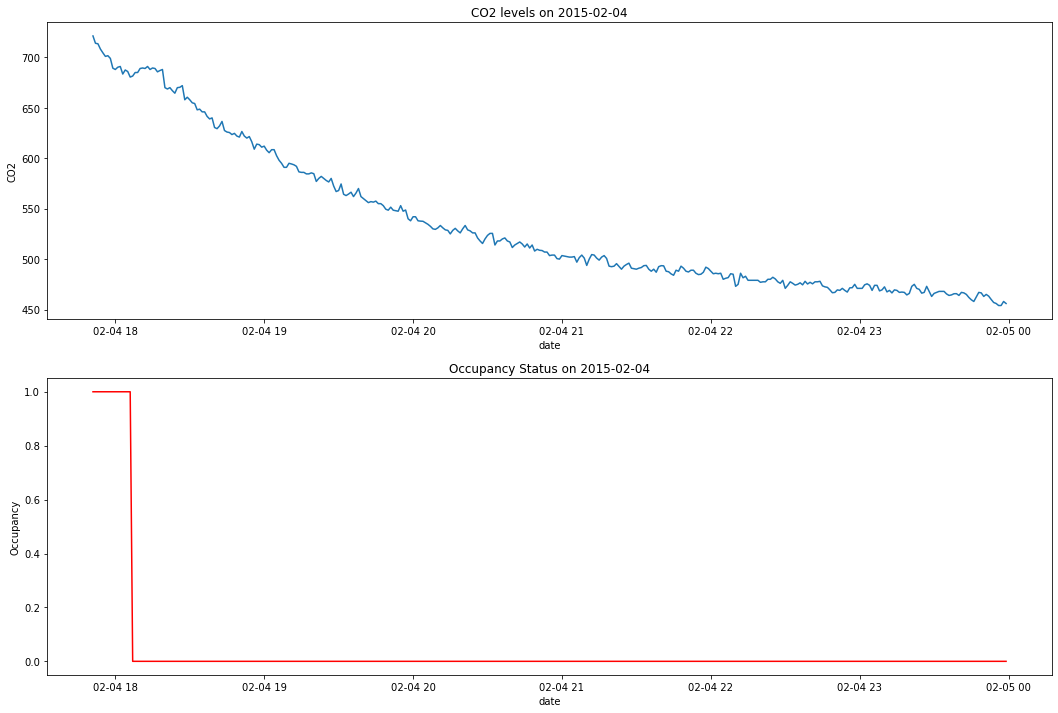

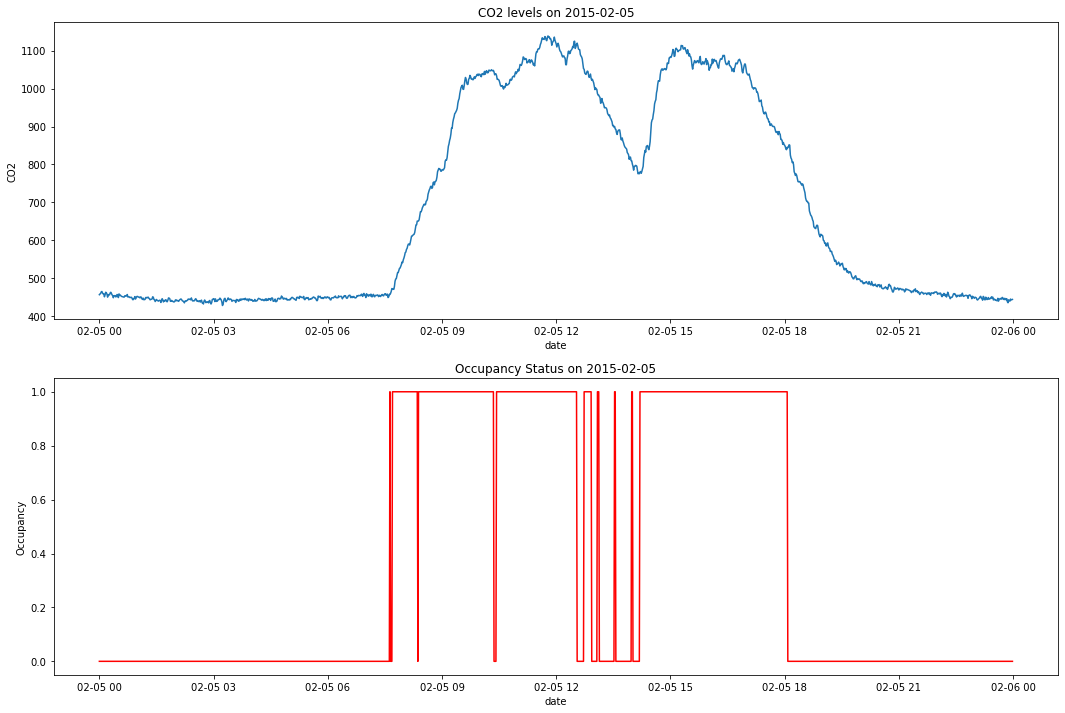

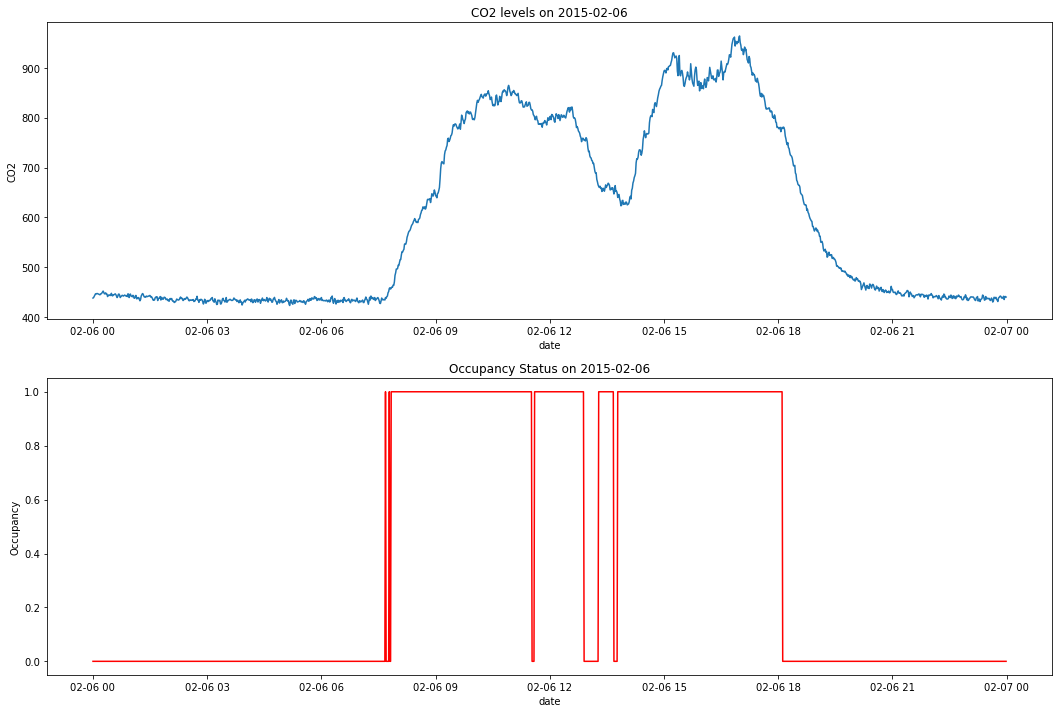

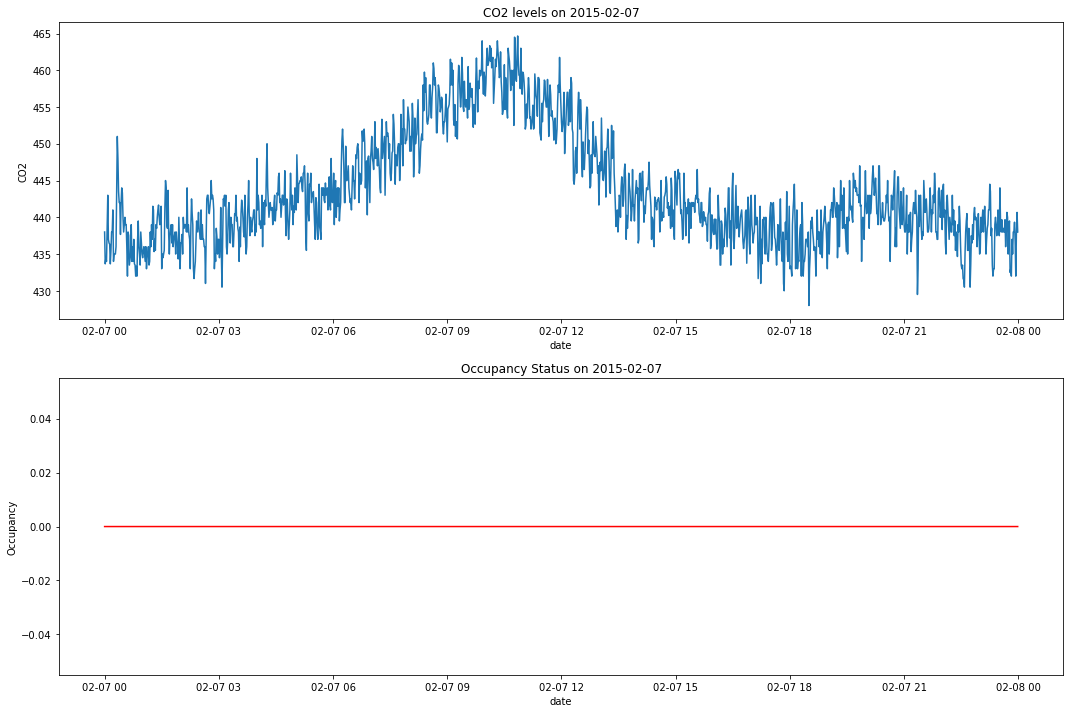

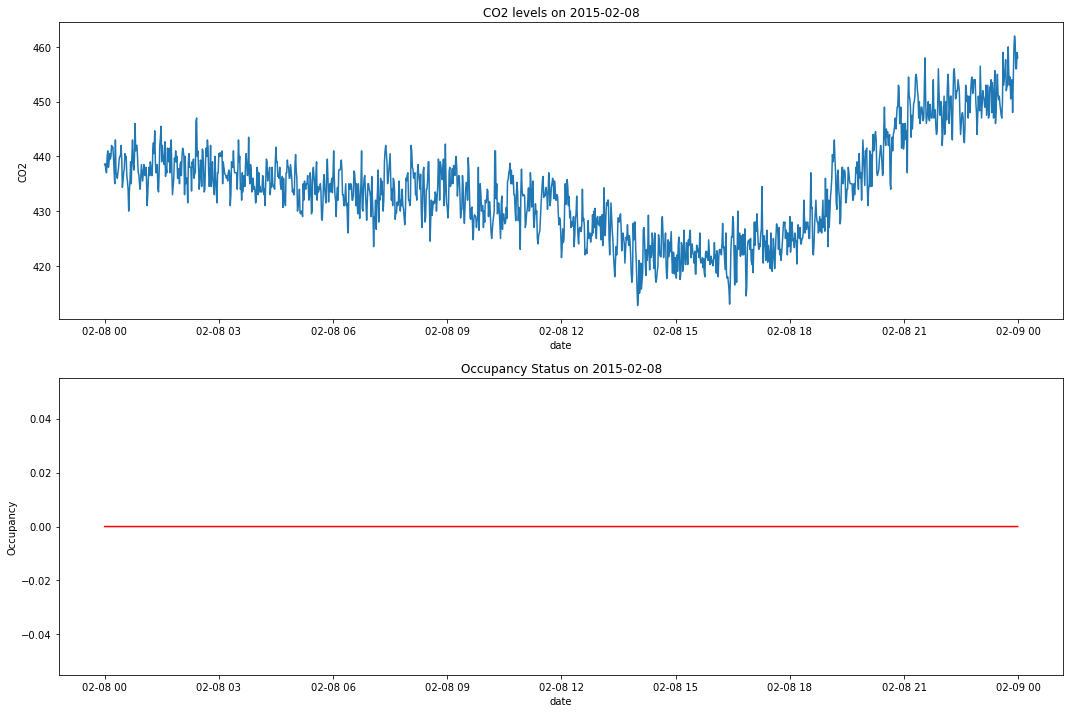

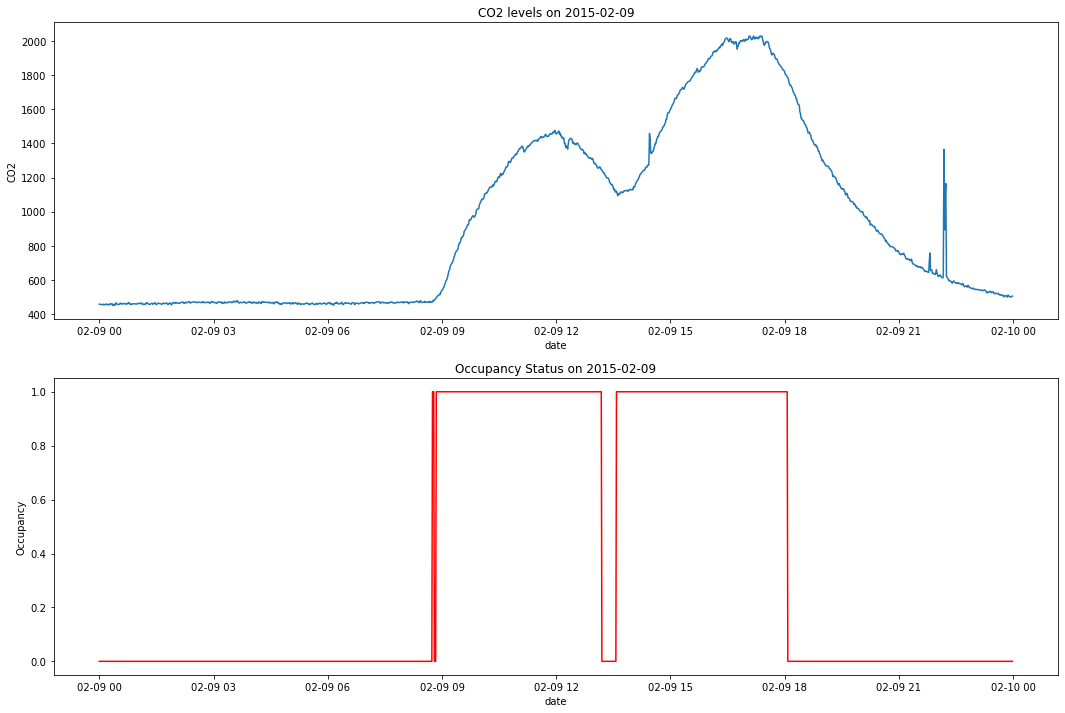

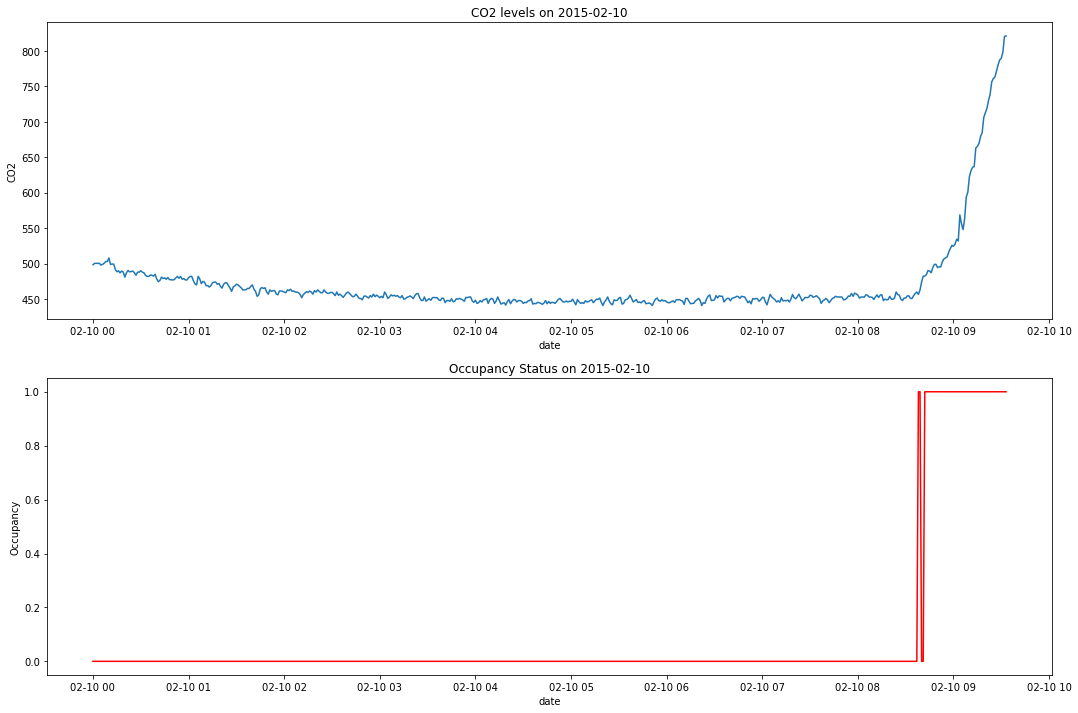

In [18]:
lineplot_graph(date_list,df,'CO2')

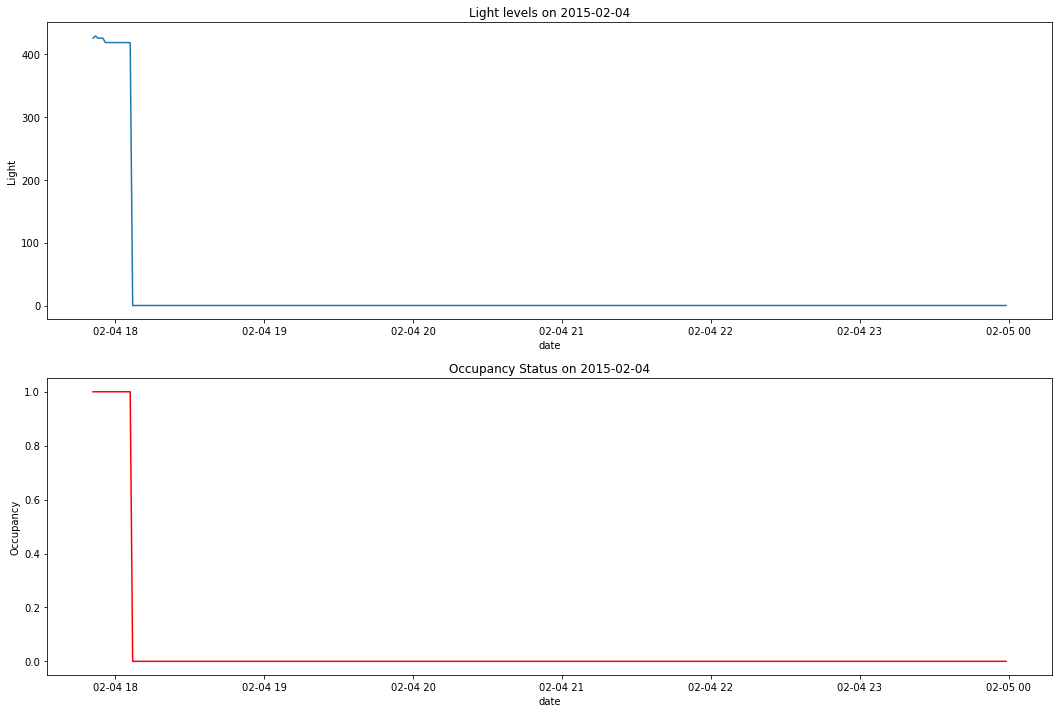

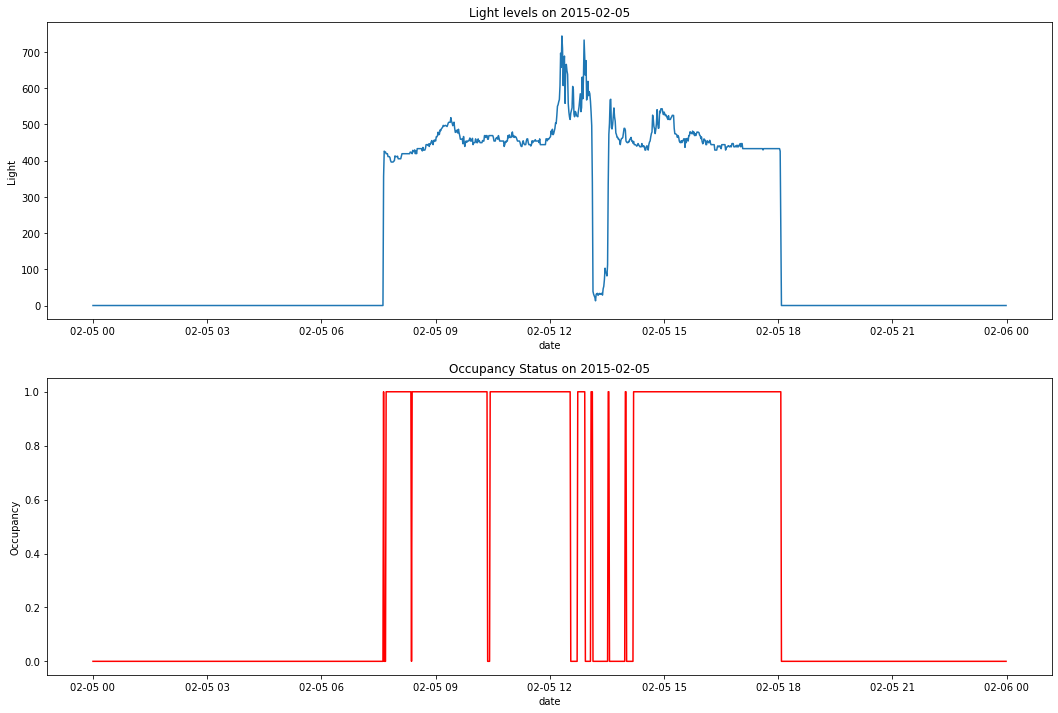

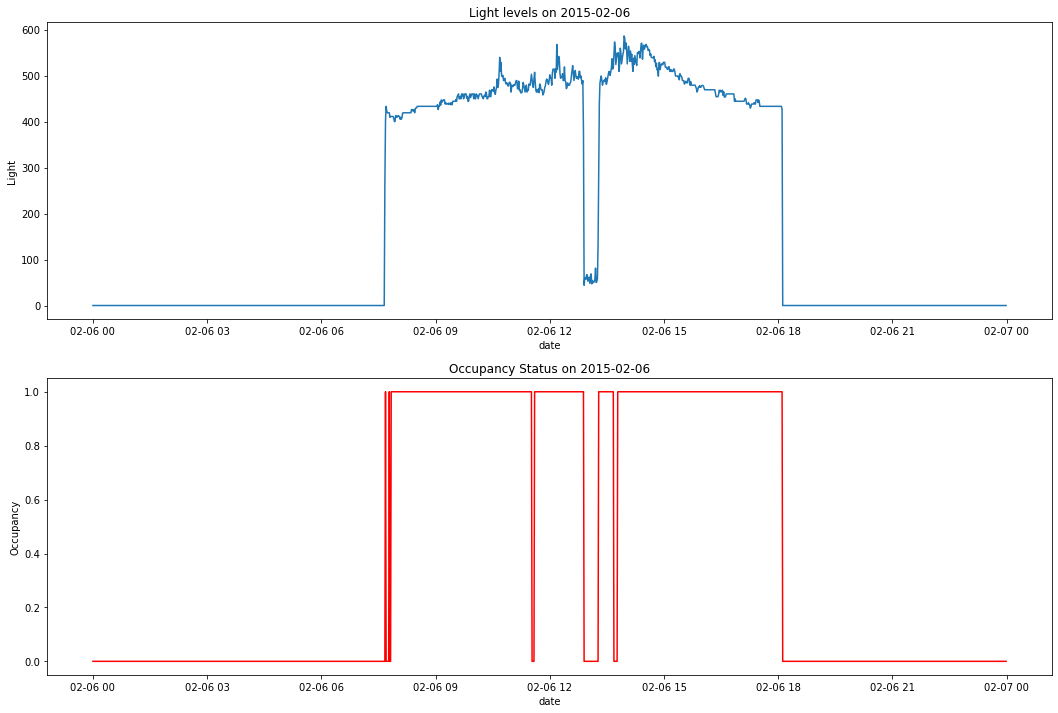

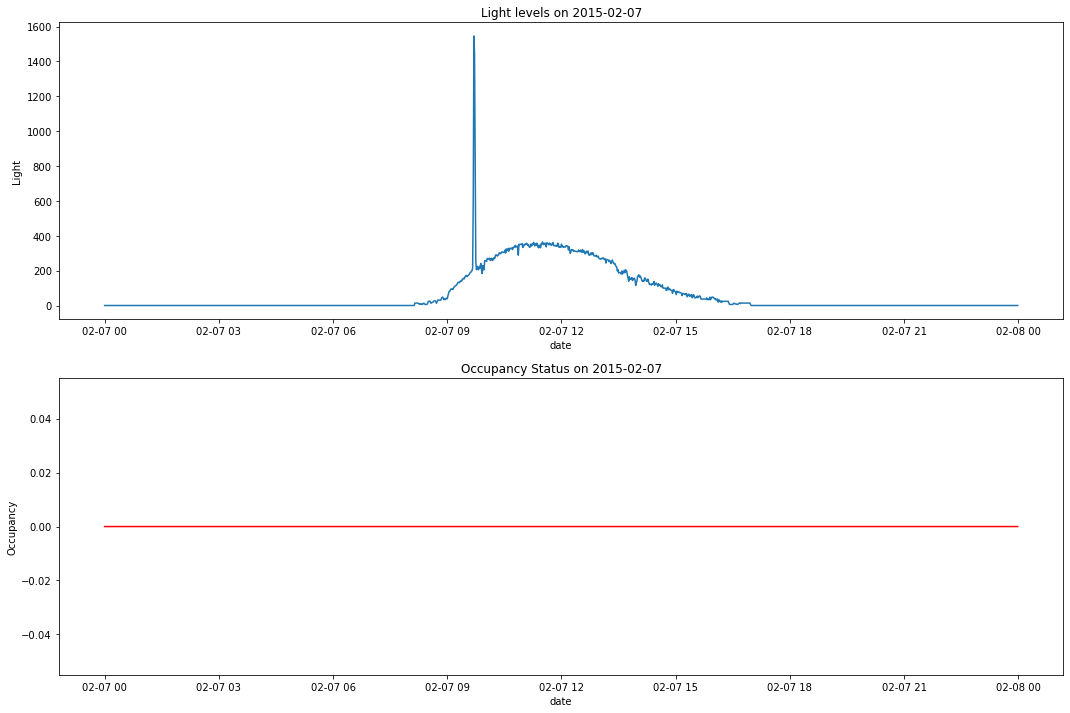

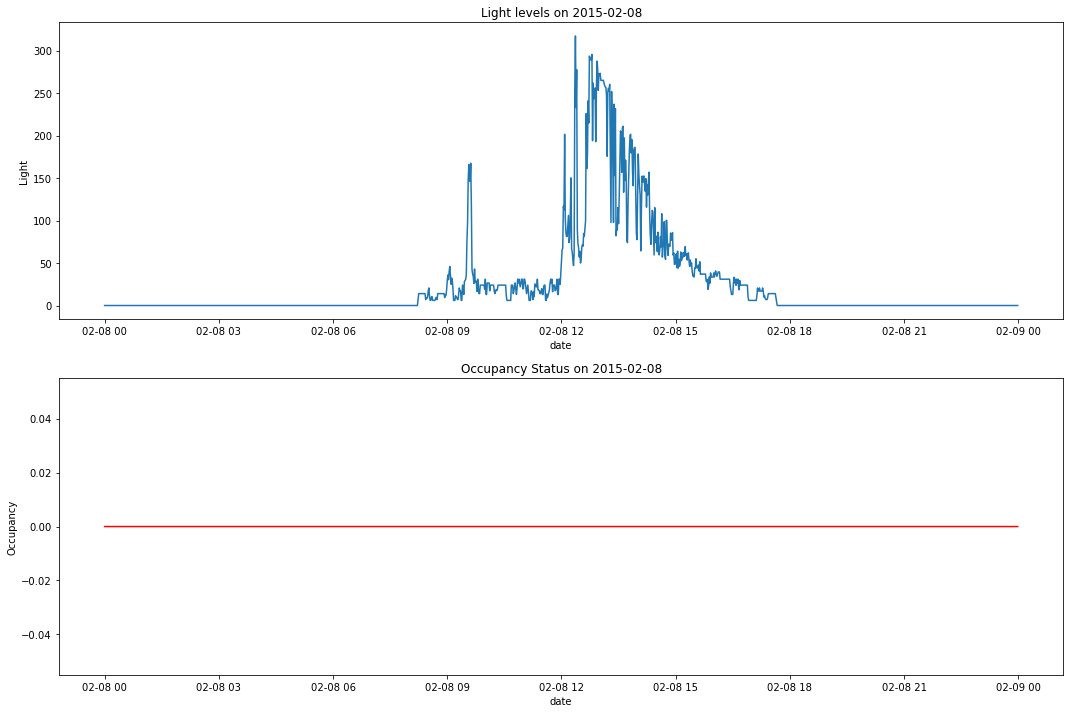

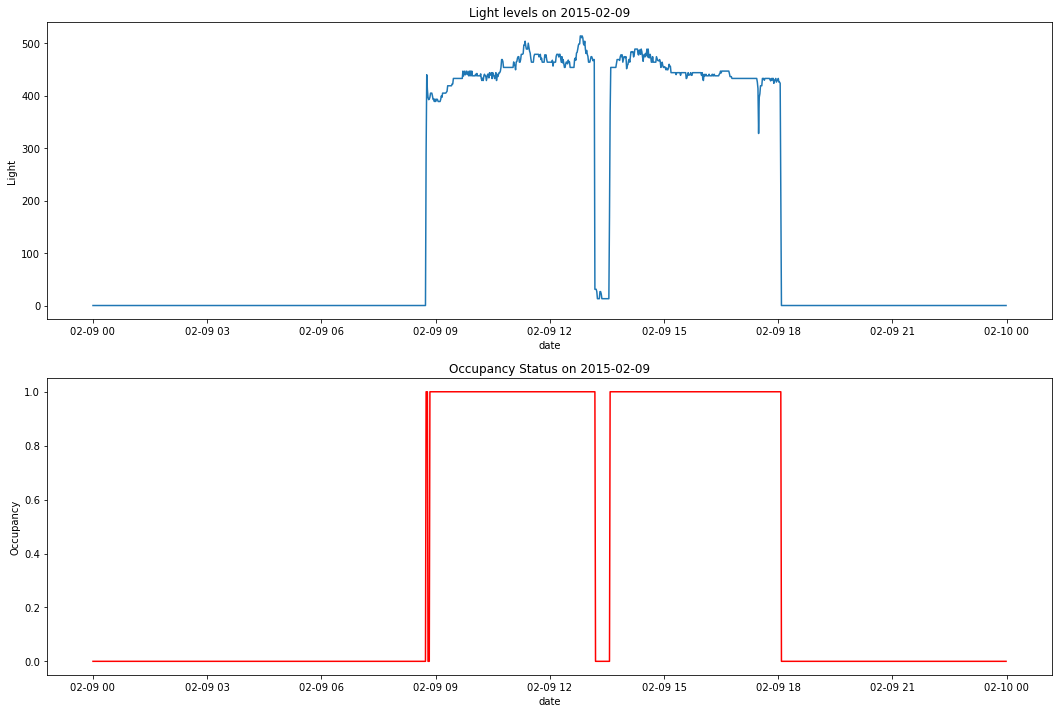

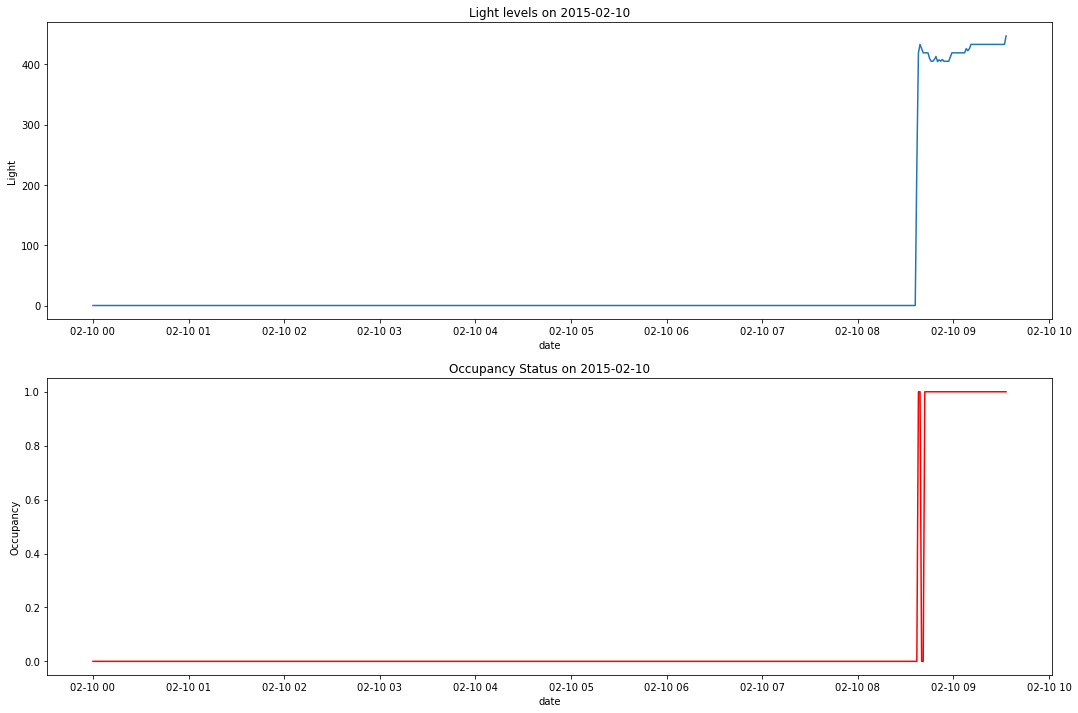

In [19]:
lineplot_graph(date_list,df,'Light')

It's clearly seen that CO2 and light levels rise at a certain interval of times during the day. On average between 9 a.m to 6 p.m, after that, the levels start to go down and maintain low during night times.

## Test Data

For this case, it is going to be used 2 datasets to test the algorithm. Both of the test dataset has to pass through the same cleansing process as the train set.

In [20]:
test1 = pd.read_csv('datatest.csv')
test2 = pd.read_csv('datatest2.csv')

In [21]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2665 entries, 0 to 2664
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2665 non-null   object 
 1   Temperature    2665 non-null   float64
 2   Humidity       2665 non-null   float64
 3   Light          2665 non-null   float64
 4   CO2            2665 non-null   float64
 5   HumidityRatio  2665 non-null   float64
 6   Occupancy      2665 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 145.9+ KB


In [22]:
test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9752 entries, 0 to 9751
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           9752 non-null   object 
 1   Temperature    9752 non-null   float64
 2   Humidity       9752 non-null   float64
 3   Light          9752 non-null   float64
 4   CO2            9752 non-null   float64
 5   HumidityRatio  9752 non-null   float64
 6   Occupancy      9752 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 533.4+ KB


In [23]:
test1.head(10)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2/2/2015 14:19,23.7000,26.272,585.200000,749.200000,0.004764,1
1,2/2/2015 14:19,23.7180,26.290,578.400000,760.400000,0.004773,1
2,2/2/2015 14:21,23.7300,26.230,572.666667,769.666667,0.004765,1
3,2/2/2015 14:22,23.7225,26.125,493.750000,774.750000,0.004744,1
4,2/2/2015 14:23,23.7540,26.200,488.600000,779.000000,0.004767,1
5,2/2/2015 14:23,23.7600,26.260,568.666667,790.000000,0.004779,1
6,2/2/2015 14:25,23.7300,26.290,536.333333,798.000000,0.004776,1
7,2/2/2015 14:25,23.7540,26.290,509.000000,797.000000,0.004783,1
8,2/2/2015 14:26,23.7540,26.350,476.000000,803.200000,0.004794,1
9,2/2/2015 14:28,23.7360,26.390,510.000000,809.000000,0.004796,1


The function written below is just only to clear the duplicate times.

In [24]:
def clean_dates(data):
    duplicate= data.copy()
    data['date']=pd.to_datetime(data['date'])
    duplicate['date']=pd.to_datetime(duplicate['date'])
    duplicate= duplicate[duplicate.duplicated(['date'],keep='first')]

    while duplicate.empty == False :
        duplicate['date']=duplicate['date']+T1
        data.update(duplicate)
        duplicate= data[data.duplicated(['date'],keep='first')]
        
    data['Date'] = [d.date() for d in data['date']]
    data['Time'] = [d.time() for d in data['date']]
    
    return data

In [25]:
test1=clean_dates(test1)

<ipython-input-24-3abf677b5518>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicate['date']=duplicate['date']+T1


In [26]:
test1.head(10)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,Date,Time
0,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1.0,2015-02-02,14:19:00
1,2015-02-02 14:20:00,23.7180,26.290,578.400000,760.400000,0.004773,1.0,2015-02-02,14:20:00
2,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1.0,2015-02-02,14:21:00
3,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1.0,2015-02-02,14:22:00
4,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1.0,2015-02-02,14:23:00
5,2015-02-02 14:24:00,23.7600,26.260,568.666667,790.000000,0.004779,1.0,2015-02-02,14:24:00
6,2015-02-02 14:25:00,23.7300,26.290,536.333333,798.000000,0.004776,1.0,2015-02-02,14:25:00
7,2015-02-02 14:26:00,23.7540,26.290,509.000000,797.000000,0.004783,1.0,2015-02-02,14:26:00
8,2015-02-02 14:27:00,23.7540,26.350,476.000000,803.200000,0.004794,1.0,2015-02-02,14:27:00
9,2015-02-02 14:28:00,23.7360,26.390,510.000000,809.000000,0.004796,1.0,2015-02-02,14:28:00


Let's visualize the CO2 levels

In [27]:
date_list_test1=list(test1.Date.unique())

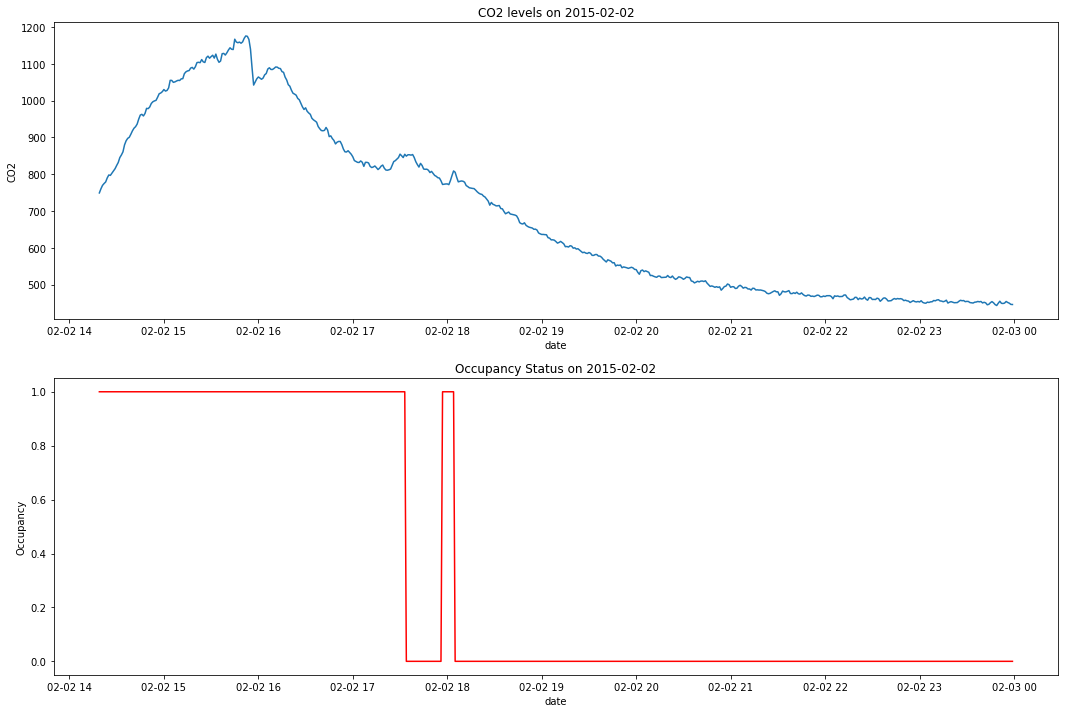

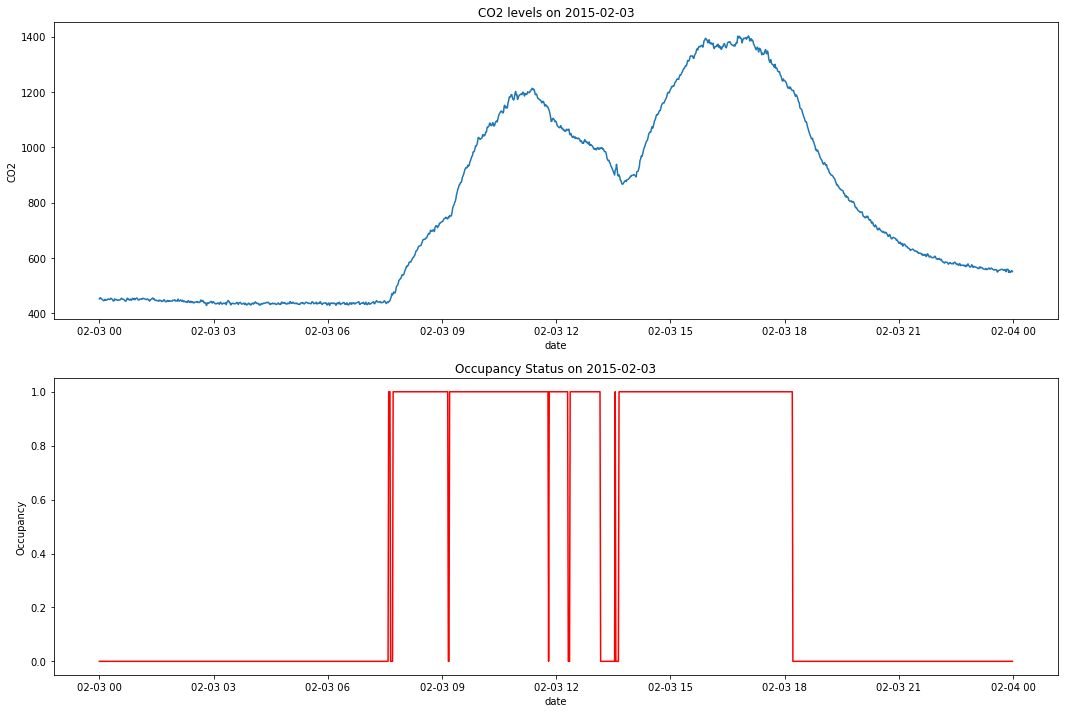

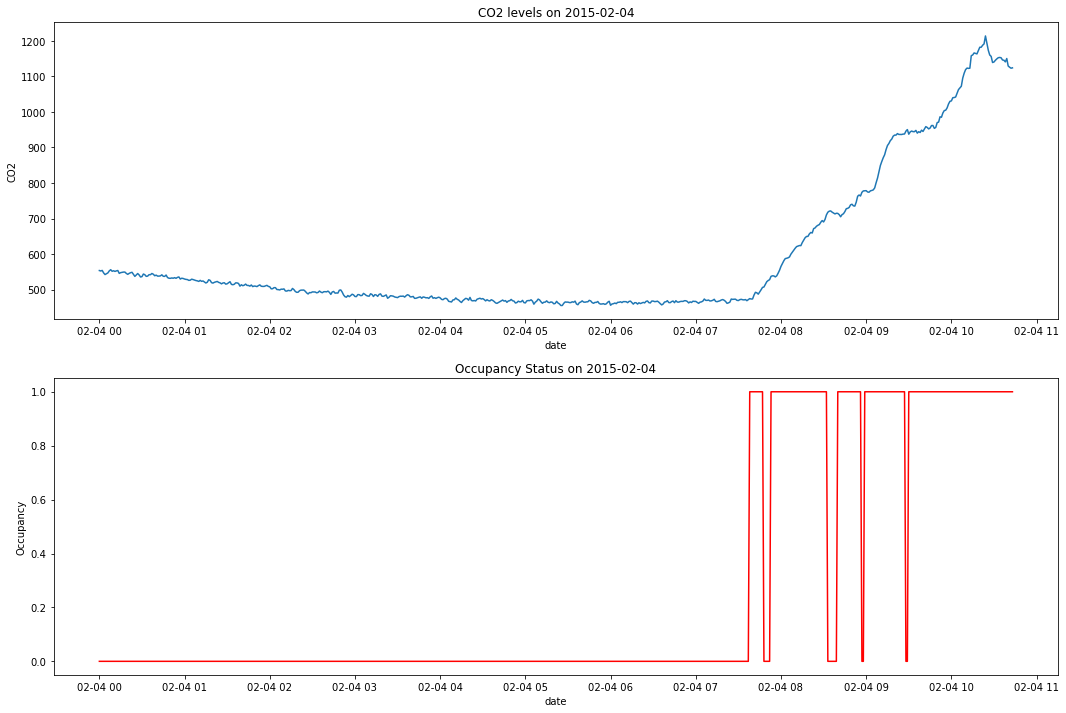

In [28]:
lineplot_graph(date_list_test1,test1,'CO2')

In [29]:
test2=clean_dates(test2)

<ipython-input-24-3abf677b5518>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicate['date']=duplicate['date']+T1


In [30]:
date_list_test2=list(test2.Date.unique())

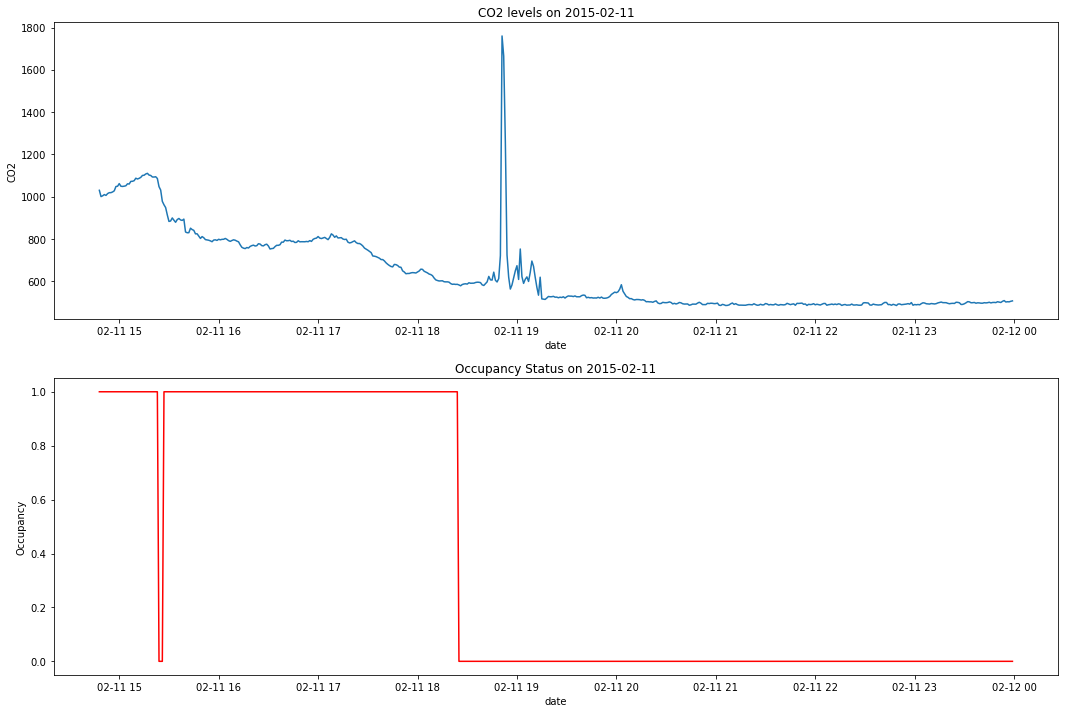

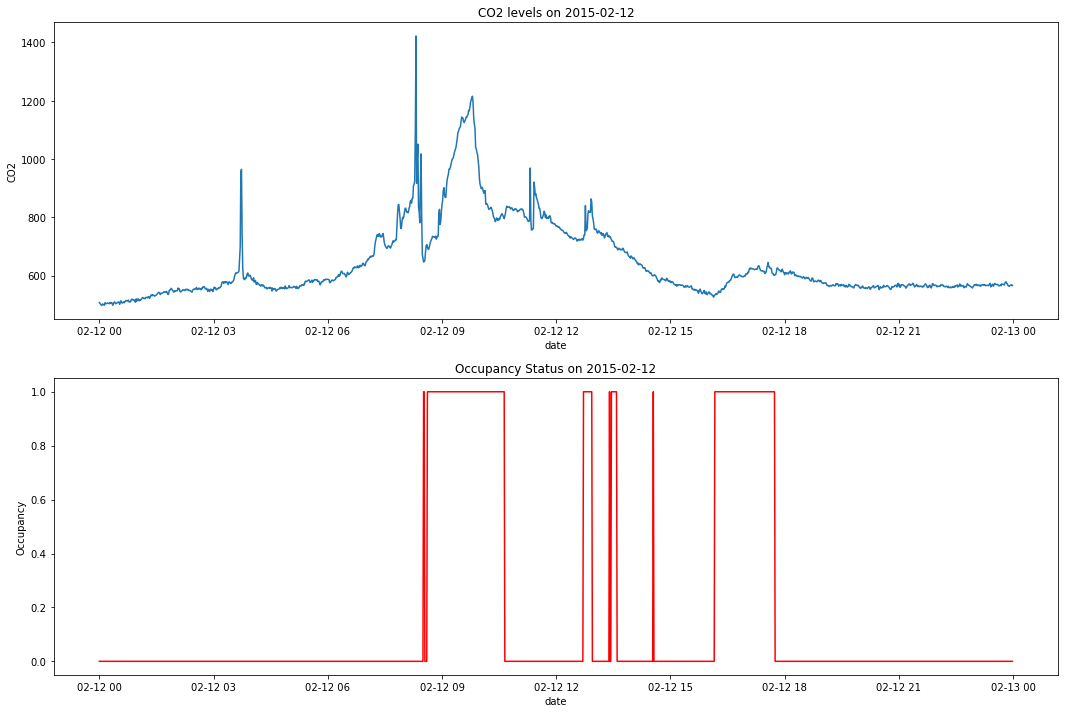

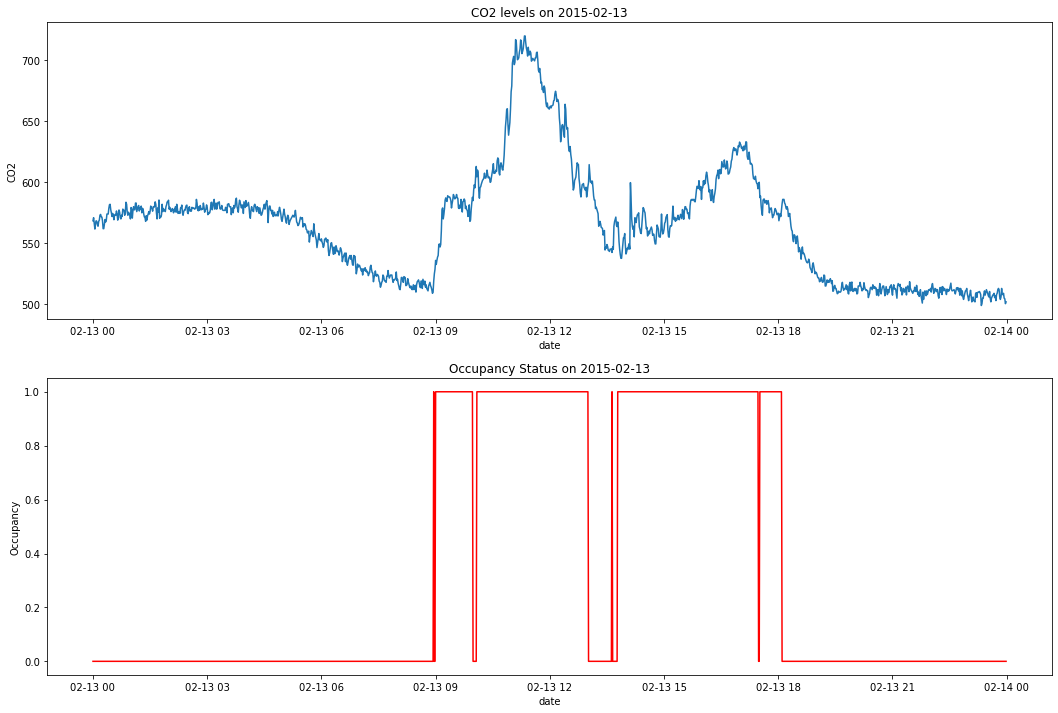

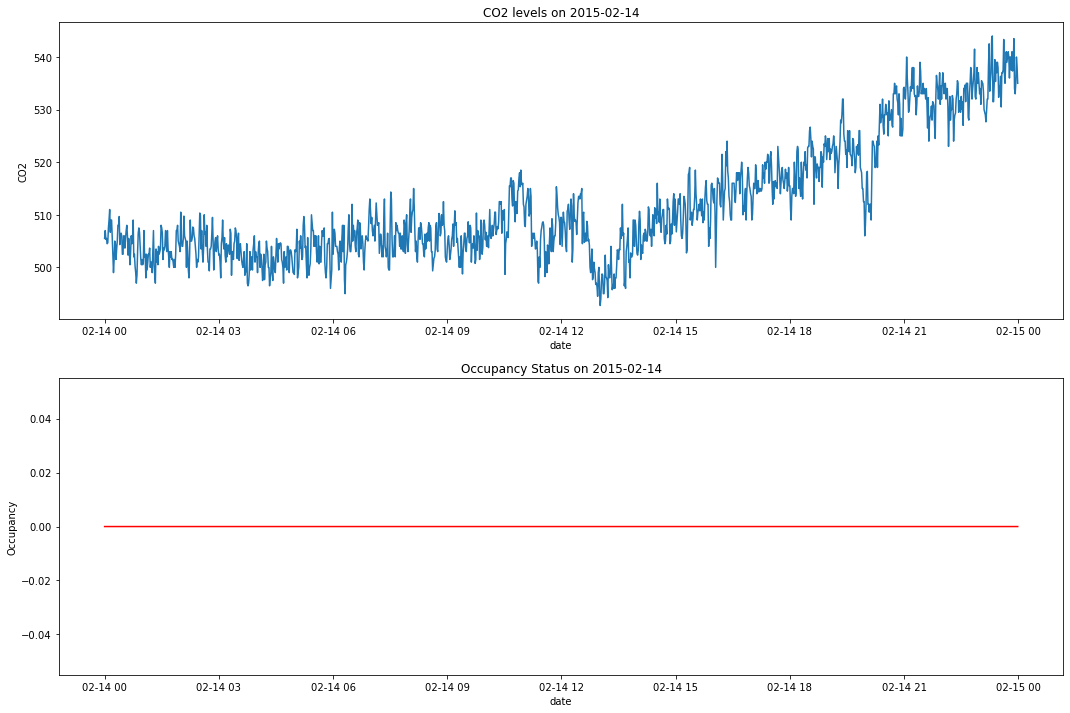

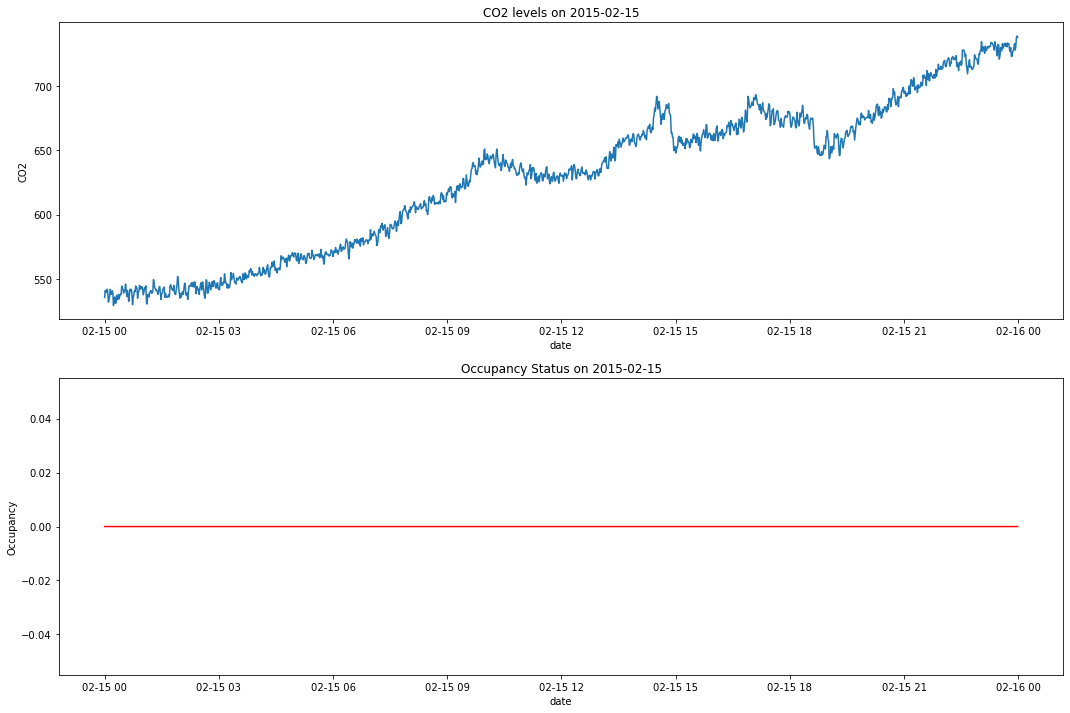

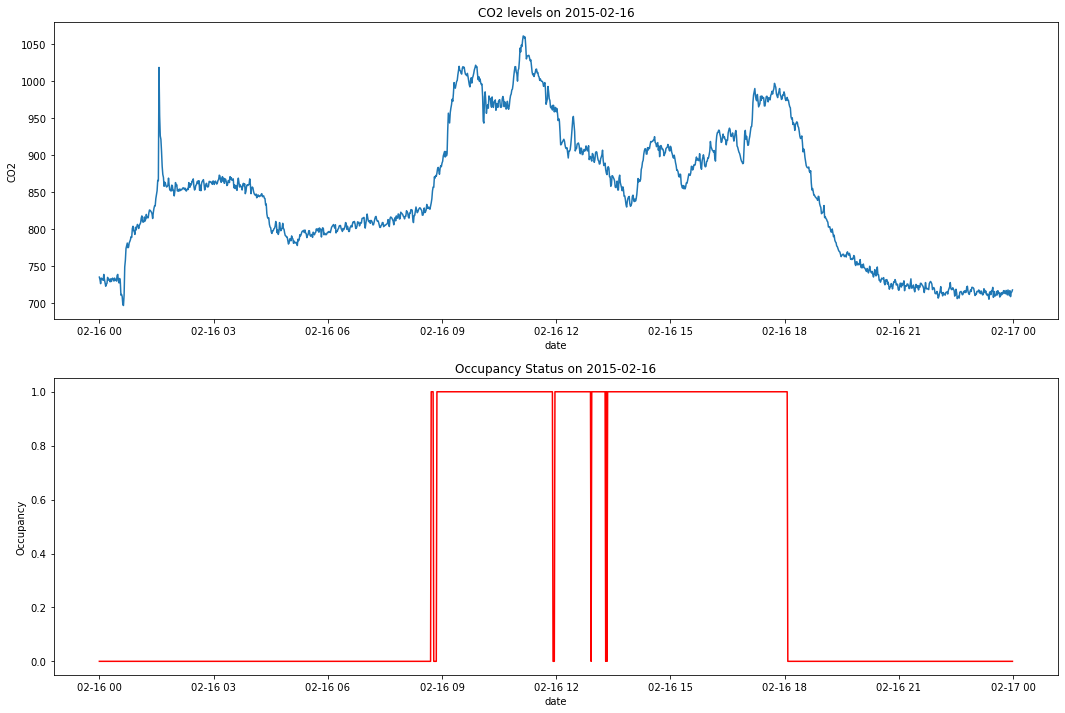

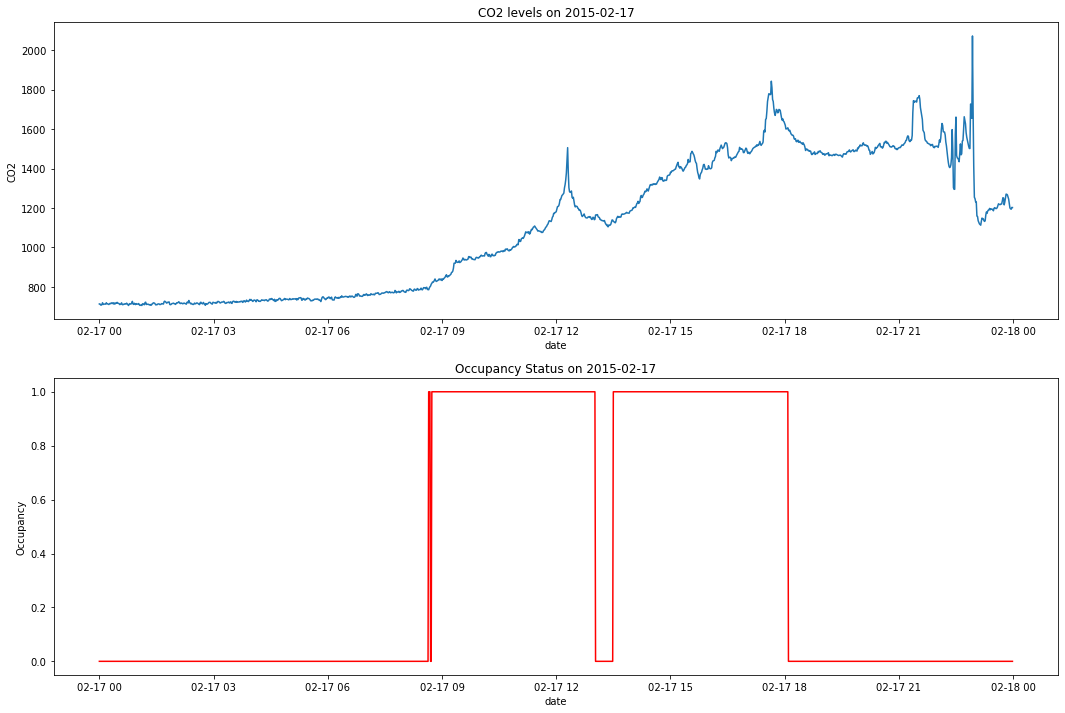

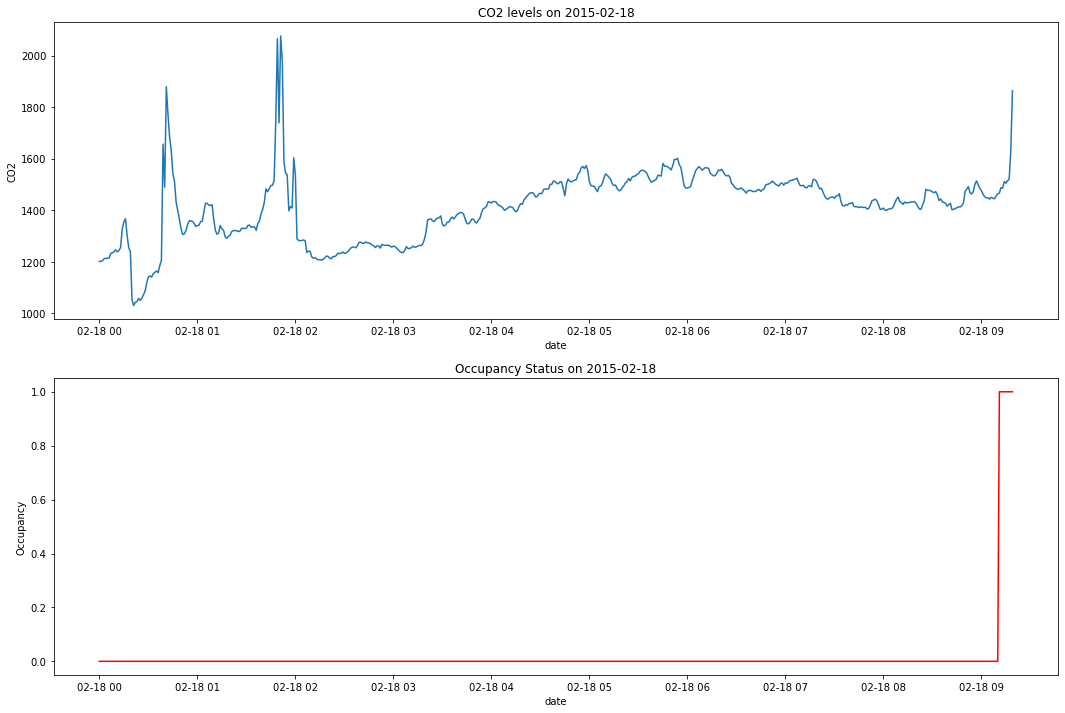

In [31]:
lineplot_graph(date_list_test2,test2,'CO2')

We can see the same pattern as the train set. Definitely CO2 and light marks a good correlation with occupancy.

Now the model is ready to be train.

## Training the Model

A classification model is usually the best to approach this analysis. For this case I'm going to compare 3 of them, which are: 
Logistic Regression, Random Forest and Decission Tree

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
#from sklearn import preprocessing
#from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#### Chossing the parameters

In [33]:
X = np.asarray(df[['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']])
y = np.asarray(df['Occupancy'])

In [34]:
xtest1 = np.asarray(test1[['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']])
ytest1 = np.asarray(test1['Occupancy'])

In [35]:
xtest2 = np.asarray(test2[['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio']])
ytest2 = np.asarray(test2['Occupancy'])

### Logistic Regression

### Test 1

In [36]:
LR = LogisticRegression(C=0.01, solver='liblinear')

In [37]:
LR.fit(X,y)

LogisticRegression(C=0.01, solver='liblinear')

In [38]:
y_pred = LR.predict(xtest1)
proba = LR.predict_proba(xtest1)
roc_score = roc_auc_score(ytest1, proba[:,1])

In [39]:
score = accuracy_score(ytest1,y_pred)
bin_clf_rep = classification_report(ytest1,y_pred, zero_division=1)
print("Accuracy :", score)
print("AUC Score : ", roc_score)
print(bin_clf_rep)
print(confusion_matrix(ytest1,y_pred,labels=[1,0]))

Accuracy : 0.9782363977485928
AUC Score :  0.9918764994567317
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98      1693
         1.0       0.95      1.00      0.97       972

    accuracy                           0.98      2665
   macro avg       0.97      0.98      0.98      2665
weighted avg       0.98      0.98      0.98      2665

[[ 969    3]
 [  55 1638]]


### Test 2

In [40]:
y_pred = LR.predict(xtest2)
proba = LR.predict_proba(xtest2)
roc_score = roc_auc_score(ytest2, proba[:,1])

In [41]:
score = accuracy_score(ytest2,y_pred)
bin_clf_rep = classification_report(ytest2,y_pred, zero_division=1)
print("Accuracy :", score)
print("AUC Score : ", roc_score)
print(bin_clf_rep)
print(confusion_matrix(ytest2,y_pred,labels=[1,0]))

Accuracy : 0.993129614438064
AUC Score :  0.9960995212262569
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      7703
         1.0       0.97      0.99      0.98      2049

    accuracy                           0.99      9752
   macro avg       0.99      0.99      0.99      9752
weighted avg       0.99      0.99      0.99      9752

[[2038   11]
 [  56 7647]]


### Random Forest

### Test 1

In [42]:
RF=RandomForestClassifier(n_estimators =100)

In [43]:
RF.fit(X,y)

RandomForestClassifier()

In [44]:
y_pred = RF.predict(xtest1)
proba = RF.predict_proba(xtest1)
roc_score = roc_auc_score(ytest1, proba[:,1])

In [45]:
score = accuracy_score(ytest1,y_pred)
bin_clf_rep = classification_report(ytest1,y_pred, zero_division=1)
print("Accuracy :", score)
print("AUC Score : ", roc_score)
print(bin_clf_rep)
print(confusion_matrix(ytest1,y_pred,labels=[1,0]))

Accuracy : 0.9380863039399625
AUC Score :  0.9871627057917011
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      1693
         1.0       0.94      0.88      0.91       972

    accuracy                           0.94      2665
   macro avg       0.94      0.93      0.93      2665
weighted avg       0.94      0.94      0.94      2665

[[ 857  115]
 [  50 1643]]


### Test 2

In [46]:
y_pred = RF.predict(xtest2)
proba = RF.predict_proba(xtest2)
roc_score = roc_auc_score(ytest2, proba[:,1])

In [47]:
score = accuracy_score(ytest2,y_pred)
bin_clf_rep = classification_report(ytest2,y_pred, zero_division=1)
print("Accuracy :", score)
print("AUC Score : ", roc_score)
print(bin_clf_rep)
print(confusion_matrix(ytest2,y_pred,labels=[1,0]))

Accuracy : 0.9681091058244463
AUC Score :  0.9941284372165344
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      7703
         1.0       0.89      0.97      0.93      2049

    accuracy                           0.97      9752
   macro avg       0.94      0.97      0.95      9752
weighted avg       0.97      0.97      0.97      9752

[[1984   65]
 [ 246 7457]]


In [58]:
models = [LogisticRegression(C=0.01, solver='liblinear'),
          DecisionTreeClassifier(),
          RandomForestClassifier(n_estimators =100),
          ]

def run_models (xtrain,ytrain,xtest1,ytest1,xtest2,ytest2):
    accuracy_l1 = []
    accuracy_l2 = []
    model_name = []
    for model in models:
        #test1
        model.fit(xtrain,ytrain)
        y_pred = model.predict(xtest1)
        proba = model.predict_proba(xtest1)
        roc_score = roc_auc_score(ytest1, proba[:,1])
        score = accuracy_score(ytest1,y_pred)
        accuracy_l1.append(score)
        #test2
        y_pred = model.predict(xtest2)
        proba = model.predict_proba(xtest2)
        roc_score = roc_auc_score(ytest2, proba[:,1])
        score = accuracy_score(ytest2,y_pred)
        accuracy_l2.append(score)
        
        name = str(model)
        model_name.append(name[0:name.find("(")])
        
    df_result = pd.DataFrame(list(zip(model_name,accuracy_l1,accuracy_l2)),columns=['Model','Accuracy 1','Accuracy 2'])
        
    return df_result

In [59]:
df_result = run_models(X,y,xtest1,ytest1,xtest2,ytest2)

In [60]:
df_result

,Model,Accuracy 1,Accuracy 2
0,LogisticRegression,0.978236,0.993130
1,DecisionTreeClassifier,0.904690,0.963392
2,RandomForestClassifier,0.948218,0.971903
